In [2]:
import time
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

## 2.1 Verify if the parameters obtained from the closed-form solution are the same as coeffs

Sample Size : 1000, difference between closed_form solution and coefficient : 0.
Sample Size : 1500, difference between closed_form solution and coefficient : 0.
Sample Size : 2000, difference between closed_form solution and coefficient : 0.
Sample Size : 2500, difference between closed_form solution and coefficient : 0.
Sample Size : 3000, difference between closed_form solution and coefficient : 0.
Sample Size : 3500, difference between closed_form solution and coefficient : 0.
Sample Size : 4000, difference between closed_form solution and coefficient : 0.
Sample Size : 4500, difference between closed_form solution and coefficient : 0.
Sample Size : 5000, difference between closed_form solution and coefficient : 0.
Sample Size : 5500, difference between closed_form solution and coefficient : 0.
Sample Size : 6000, difference between closed_form solution and coefficient : 0.
Sample Size : 6500, difference between closed_form solution and coefficient : 0.
Sample Size : 7000, differen

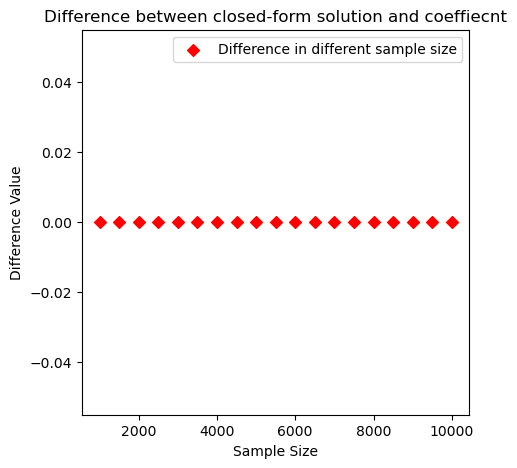

In [58]:
sample_size = np.arange(1000,10500,500) 
diff = []

for n_samples in sample_size:
    X_i, y_i ,coef_i= make_regression(n_samples=n_samples,coef = True,random_state= 10)
    
    #Using closed-form solution method to caculate Beta.
    beta_i = inv(np.transpose(X_i)@X_i)@np.transpose(X_i)@y_i
    
    # How many coefficents differ by more than 0.0000000001 units by using ordinary least square method.
    difference = abs(np.isclose(beta_i, coef_i, atol=1e-10).sum() - len(beta_i))
    diff.append(difference)
    print(f"Sample Size : {n_samples}, difference between closed_form solution and coefficient : {difference}.")
    

plt.figure(figsize=(5, 5))
plt.scatter(sample_size, diff, marker = 'D',color = "red",label = "Difference in different sample size")
plt.ylabel("Difference Value")
plt.xlabel("Sample Size")
plt.title("Difference between closed-form solution and coeffiecnt")
plt.legend()
plt.show()

As we can see above. The beta we get from closed-from solution is almost the same with coefficient.

## 2.2 The drawbacks of Closed_form OLS solution

Assuming that the dataset has n samples and m features, hence the $X$ is a n x m size matrix. In the step of closed-form solution, $X^{T}X$ will be calculated, which is a m x m size matrix. The most important thing is that the execution efficiency of the algorithm for finding $(X^{T}X)^{-1}$ is very low.

According to the complexity of algorithm, the matrix inversion code has cubic complexity $O(n^{3})$.

Therefore, as the number of features increases, the computer will need greater performance to handle a large number of iterations.This means that when the number of features is very large (that is, when m is very large), the performance of the computer is not enough to handle such a huge calculation, and will waste more time and efficiency. Above all, the closed form solution is only suitable for processing datasets with a relatively low number of features.

We can vividly see the potential disadvantages of closed-form through the execution time of the program:

In [70]:
#Create a function which can calculate the operating time between this 2 methods

def operating_time(n_features:int)->float:
    """A function that calculates operating time between closed form solution and other method."""
    start_1 = time.time()
    X_i, y_i ,coef_i= make_regression(n_samples=1000, n_features=n_features,coef = True,random_state= 10)
    end_1 = time.time()
    time_1 = end_1 - start_1 #the time make_regression runs
    
    start_2 = time.time()
    beta_i = inv(np.transpose(X_i)@X_i)@np.transpose(X_i)@y_i
    end_2 = time.time()
    time_2 = end_2 - start_2 #the time closed-form solution runs
    return time_1,time_2

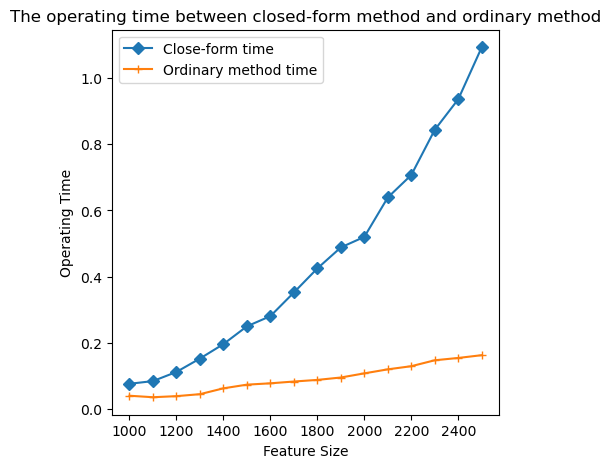

In [71]:
feature_size = np.arange(1000,2600,100)
closeform_time = []
make_regression_time = []

#calulate the operating time which these two methods need and plot them with increasing feature size.
for i,n_features in enumerate(feature_size):
    value_1,value_2 = operating_time(n_features = n_features)
    closeform_time.append(value_2)
    make_regression_time.append(value_1)

plt.figure(figsize=(5, 5))
plt.plot(feature_size, closeform_time, marker = 'D', label = "Close-form time")
plt.plot(feature_size, make_regression_time, marker = '+', label = "Ordinary method time")
plt.xlabel("Feature Size")
plt.ylabel("Operating Time")
plt.title("The operating time between closed-form method and ordinary method")
plt.legend()
plt.show()

From this example, we can see that when the feature size continues to increase, the execution time of the closed-form solution program increases at an alarming rate, and is far greater than the execution time of the ordinary method.